# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import seed, choice
from sklearn import tree
from collections import Counter
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/workspaces/random_forest_RDH/data/processed/df_cleaned_diabetes.csv')
df.head()

,Unnamed: 0,Pregnancies,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp
0,0,6,35,33.6,0.627,50,1,148.0,72.0
1,1,1,29,26.6,0.351,31,0,85.0,66.0
2,2,8,0,23.3,0.672,32,1,183.0,64.0
3,3,1,23,28.1,0.167,21,0,89.0,66.0
4,4,0,35,43.1,2.288,33,1,137.0,40.0


#### **EL EDA FUE ELABORADO EN EL ÚLTIMO PROYECTO**

### Partición de Datos y Entrenamiento del modelo

In [3]:
#Definición de variables predictoras y variable objetivo
X = df.drop(columns=['Outcome'])  # Todas menos la variable objetivo
y = df['Outcome']   

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Entrenamiento con un modelo por defecto (casi sin parámetros)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


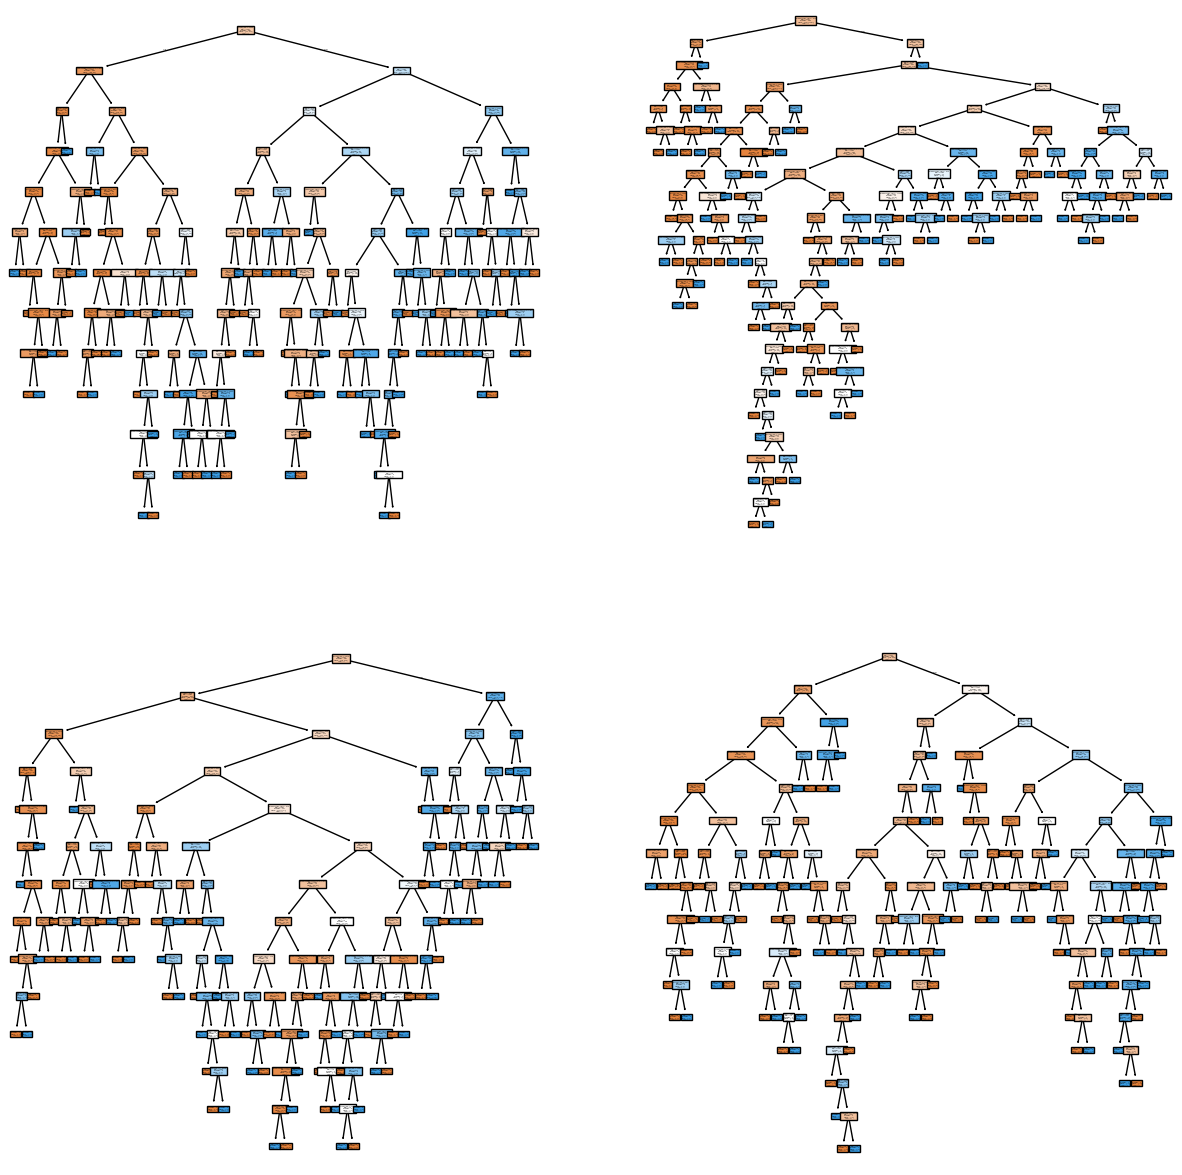

In [6]:
#Visualización de árboles y bosques
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostraremos los primeros 4 de 100 generados 
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [7]:
#Métricas para el modelo por defecto sobre el X_train
y_train_pred = model.predict(X_train)

print("Accuracy Train:", accuracy_score(y_train, y_train_pred))
print("Precision Train:", precision_score(y_train, y_train_pred))
print("Recall Train:", recall_score(y_train, y_train_pred))
print("F1 Score Train:", f1_score(y_train, y_train_pred))

Accuracy Train: 1.0
Precision Train: 1.0
Recall Train: 1.0
F1 Score Train: 1.0


Está más que visto que el modelo ha aprendido muy bien los datos a partir de la data de entrenamiento, lo predice casi a la perfección.

In [8]:
#Predicción del valor de la variable objetivo con el X_test
y_pred = model.predict(X_test)

In [9]:
#Obtención de métricas de un modelo por definición:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1 Score: 0.6605504587155964


### **Observaciones - Modelo con parámetros por defecto**
 - El 'Accuracy' en este modelo, nos indica que el 76% de los datos han sido clasificados correctamente como positivos del conjunto total.
 - La 'Precisión' con un 71% el modelo detectó positivos a todos aquellos que podían serlo (lo ha identificado correctamente). 
 - El 'Recall' o sensibilidad ha aumentado referente al árbol de decisiones y puede decirnos que del total de positivos es capaz de clasificar el 64% correctamente. 

In [10]:
model_simple = RandomForestClassifier(n_estimators=3, random_state=42, max_depth=5, min_samples_split= 20, min_samples_leaf=30)
model_simple.fit(X_train, y_train)

,n_estimators,3
,criterion,'gini'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


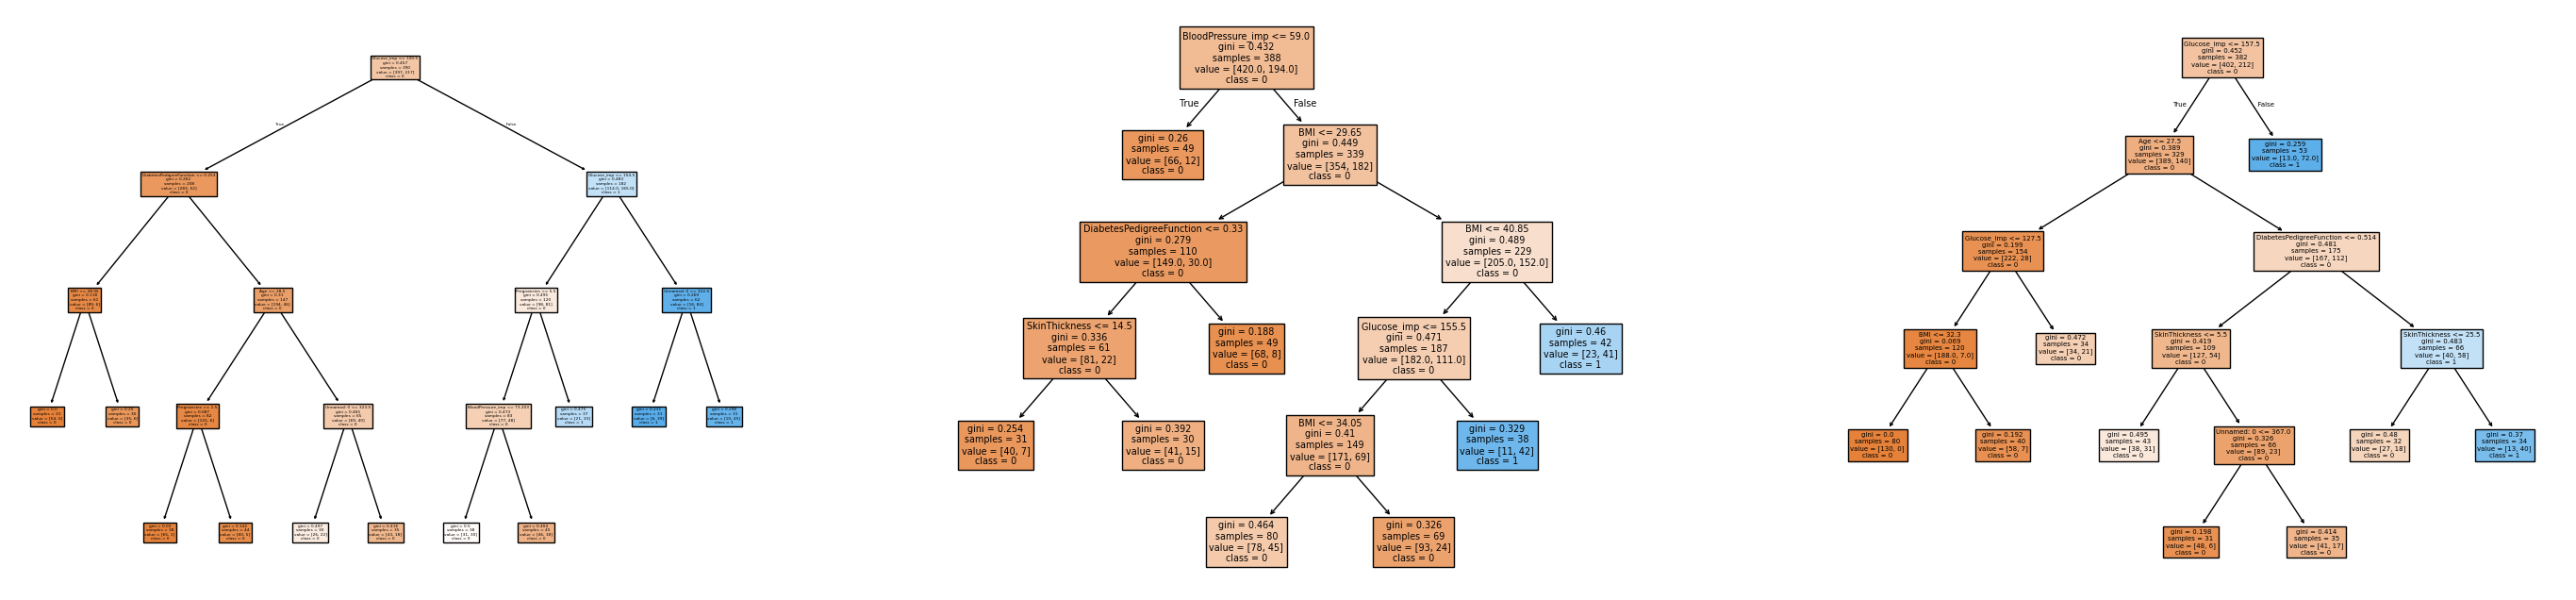

In [11]:
#Visualización de bosques para un modelo simple (con parámetros manuales):
fig, axis = plt.subplots(1, 3, figsize = (35, 8))

# Mostraremos los primeros 4:
tree.plot_tree(model_simple.estimators_[0], ax = axis[0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_simple.estimators_[1], ax = axis[1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_simple.estimators_[2], ax = axis[2], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [12]:
#Predicción del valor de la variable objetivo con el X_test
y_pred_simple = model_simple.predict(X_test)

In [13]:
#Obtención de métricas de un modelo por definición:
print("Accuracy:", accuracy_score(y_test, y_pred_simple))
print("Precision:", precision_score(y_test, y_pred_simple))
print("Recall:", recall_score(y_test, y_pred_simple))
print("F1 Score:", f1_score(y_test, y_pred_simple))

Accuracy: 0.7987012987012987
Precision: 0.8
Recall: 0.5818181818181818
F1 Score: 0.6736842105263158


### Búsqueda de hiperparámetros para afinar el modelo predictivo

Como dije anteriormente, sólo consideraré 'Accuracy' para ello.

In [14]:
#Definición y búsqueda de hiperparámetros

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train) 

print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


### Prueba del modelo predictivo con los hiperparámetros

In [15]:
model_hiper = RandomForestClassifier(n_estimators= 50, random_state=42, max_depth=5, min_samples_split= 2)
model_hiper.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


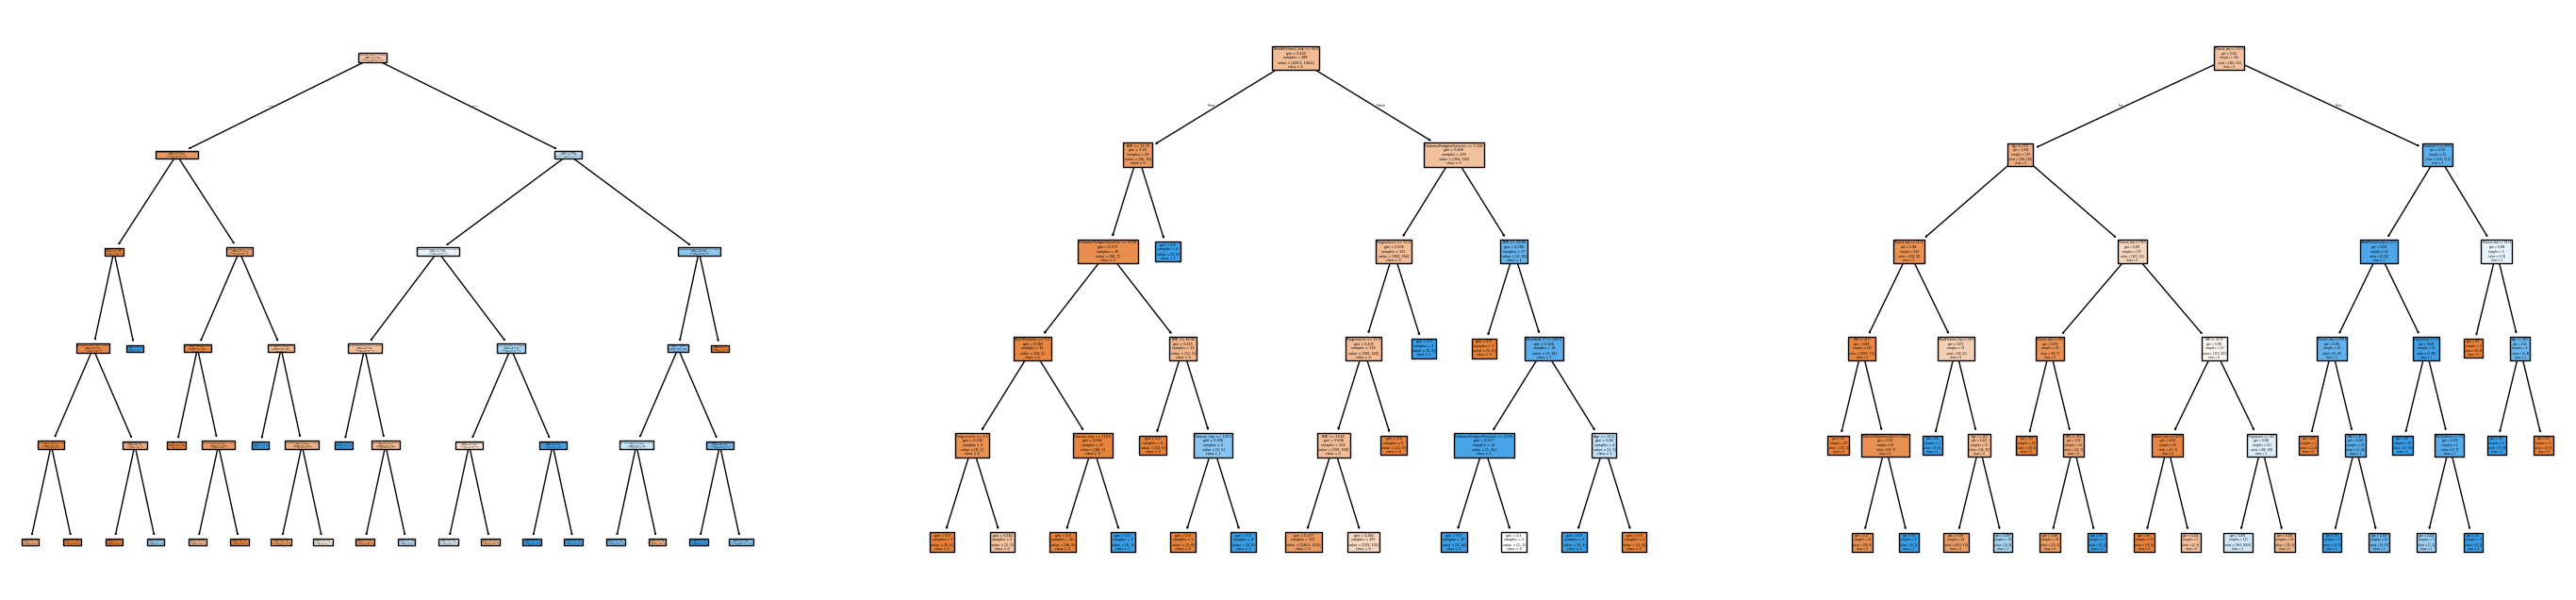

In [16]:
#Visualización de bosques para un modelo simple (con parámetros manuales):
fig, axis = plt.subplots(1, 3, figsize = (35, 8))

# Mostraremos los primeros 3 de 100 generados 
tree.plot_tree(model_hiper.estimators_[0], ax = axis[0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_hiper.estimators_[1], ax = axis[1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_hiper.estimators_[2], ax = axis[2], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [17]:
#Métricas del modelo con hiperparámetros sobre X_train:
y_train_pred2 = model_hiper.predict(X_train)

print("Accuracy Train:", accuracy_score(y_train, y_train_pred2))
print("Precision Train:", precision_score(y_train, y_train_pred2))
print("Recall Train:", recall_score(y_train, y_train_pred2))
print("F1 Score Train:", f1_score(y_train, y_train_pred2))

Accuracy Train: 0.8599348534201955
Precision Train: 0.8628571428571429
Recall Train: 0.7089201877934272
F1 Score Train: 0.7783505154639175


In [18]:
#Predicción del valor de la variable objetivo con el X_test
y_pred_hiper = model_hiper.predict(X_test)

In [19]:
#Obtención de métricas de un modelo cuyos parámetros fueron seleccionados (hiperparámetros):
print("Accuracy:", accuracy_score(y_test, y_pred_hiper))
print("Precision:", precision_score(y_test, y_pred_hiper))
print("Recall:", recall_score(y_test, y_pred_hiper))
print("F1 Score:", f1_score(y_test, y_pred_hiper))

Accuracy: 0.7727272727272727
Precision: 0.7083333333333334
Recall: 0.6181818181818182
F1 Score: 0.6601941747572816


### **Observaciones - Modelo con hiperparámetros**
 - El 'Accuracy' en este modelo, nos indica que casi el 78% de los datos de test han sido clasificados correctamente como positivos del conjunto total.
 - La 'Precisión' aumenta con respecto al modelo con parámetros por defecto a un 77%, detectando en esa proporción, positivos a todos aquellos que podían serlo (lo ha identificado correctamente). 
 - El 'Recall' o sensibilidad por otra parte, ha disminuido, puede decirnos que del total de positivos es capaz de clasificar sólo el 60% correctamente. 

### **Conclusión**

El modelo con parámetros por defecto es mucho más sensible que el modelo con hiperparámetros, pero casi que lo que tiene en sensibilidad, lo pierde en precisión. De acuerdo a estos pequeños parámetros y la finalidad del estudio, el propósito recae en la capacidad de poder predecir con mayor precisión la posibilidad de tener diabetes o no. Por ende, me inclinaría más por usar el modelo con hiperparámetros para fines de detección de esta enfermedad o estar propenso a ella, puesto que una mayor precisión segura detectar verdaderos positivos y pocos falsos positivos (personas que pueden tener la enfermedad y no detectarlo). Aunque la diabetes es una enfermedad muy curiosa, con muchísimas implicaciones y de cuidado, puede ser controlada, su manifestación y sintomatología puede presentarse de forma gradual en lapsos de tiempo manejables.

Esta decisión debe ser estudiada por médicos y profesionales del área. Si prefieren detectar pocos falsos negativos (mayor sensibilidad), porque puede estar enfermo y no detectarlo en ese momento (con muy baja probabilidad), o pocos falsos positivos porque sabemos que los que el modelo prediga que esté enfermo es porque asi lo sea.